In [11]:
# Hang Seng Composite Index-Energy Sector Historical Data-before

# view series
library(xts)
library(fUnitRoots)
library(forecast)
# setwd("C:/Users/Young/OneDrive - HKUST Connect/MAFS 5130/5130 Assignment/5130 Project")
data_a <- read.csv("../data/恒生综合指数-能源业历史数据-2.csv", header = TRUE, col.names = c("date", "close", "open", "high", "low", "volume", "variation"))
data_a$date <- as.Date(data_a$date)
data_a$close <- as.numeric(gsub(",", "", data_a$close))
data_a <- subset(data_a, !(date %in% c('2020-06-01', '2020-06-03')))
#### calculate return
sorted_index <- order(data_a$date)
data_a <- data_a[sorted_index, ]
data_a_train = with(data_a, data_a[(date >= "2020-02-03") & (date <= "2021-12-31"), ])
data_a_val = with(data_a, data_a[(date >= "2022-01-03") & (date <= "2022-02-28"), ])
data_a_test = with(data_a, data_a[(date >= "2022-03-01"), ])

log_return = diff(log(data_a_train$close))
# log_return

In [12]:
# # Hang Seng Composite Index-Energy Sector Historical Data-before

# # view series
# library(xts)
# library(fUnitRoots)
# library(forecast)
# # setwd("C:/Users/Young/OneDrive - HKUST Connect/MAFS 5130/5130 Assignment/5130 Project")
# data_b <- read.csv("../data/恒生综合指数-金融业历史数据-2.csv", header = TRUE, col.names = c("date", "close", "open", "high", "low", "volume", "variation"))
# data_b$date <- as.Date(data_b$date)
# data_b$close <- as.numeric(gsub(",", "", data_b$close))
# sorted_index <- order(data_b$date)
# data_b <- data_b[sorted_index, ]

# data_b_train = with(data_b, data_b[(date >= "2020-02-03") & (date <= "2021-12-31"), ])
# data_b_val = with(data_b, data_b[(date >= "2022-01-03") & (date <= "2022-02-28"), ])
# data_b_test = with(data_b, data_b[(date >= "2022-03-01"), ])

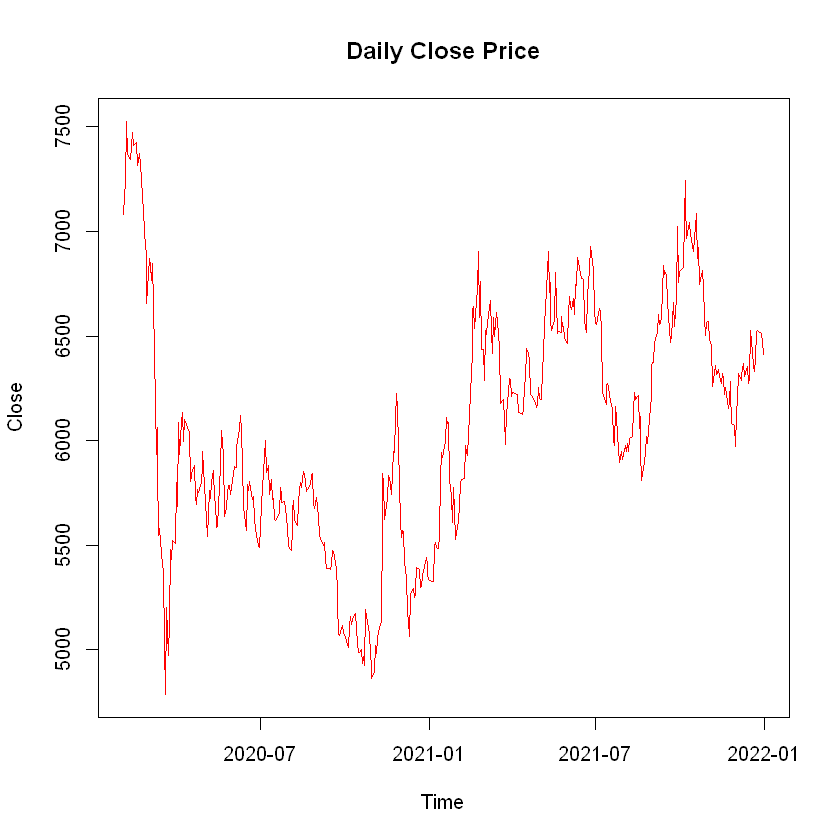

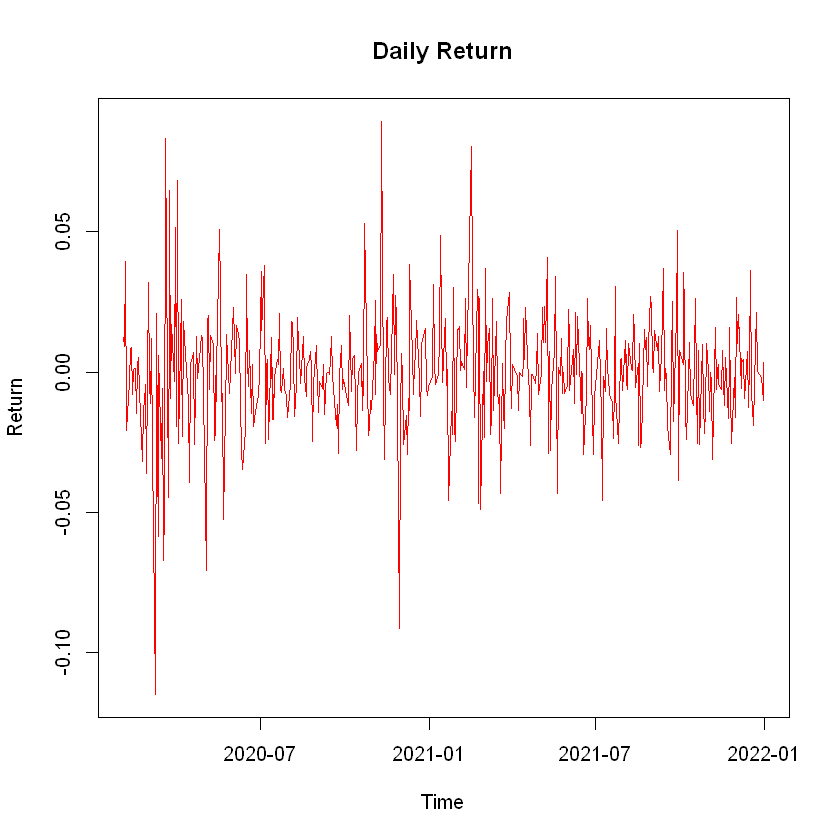

In [13]:
#### Visualization
date_strings <- data_a_train[[1]]
dates <- as.Date(date_strings, format="%Y/%m/%d")
plot(dates, data_a_train$close , xlab="Time", ylab="Close", main="Daily Close Price", type="l", col="red")
start_date = dates[2:length(dates)]
plot(start_date, log_return , xlab="Time", ylab="Return", main="Daily Return", type="l", col="red")

In [14]:
# check stationary
unitrootTest(log_return, lags=12, type=c("c"),)
#### 1.186e-08 
#### Rejecting the Null Hypothesis: Given the very small p-value associated with the test statistic (3.763e-07), you can reject the null hypothesis of a unit root at any conventional significance level. This implies that the time series data log_return is stationary.
#### d=0


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 12
  STATISTIC:
    DF: -6.5271
  P VALUE:
    t: 1.186e-08 
    n: 0.3056 

Description:
 Sat May  4 19:31:28 2024 by user: 82438

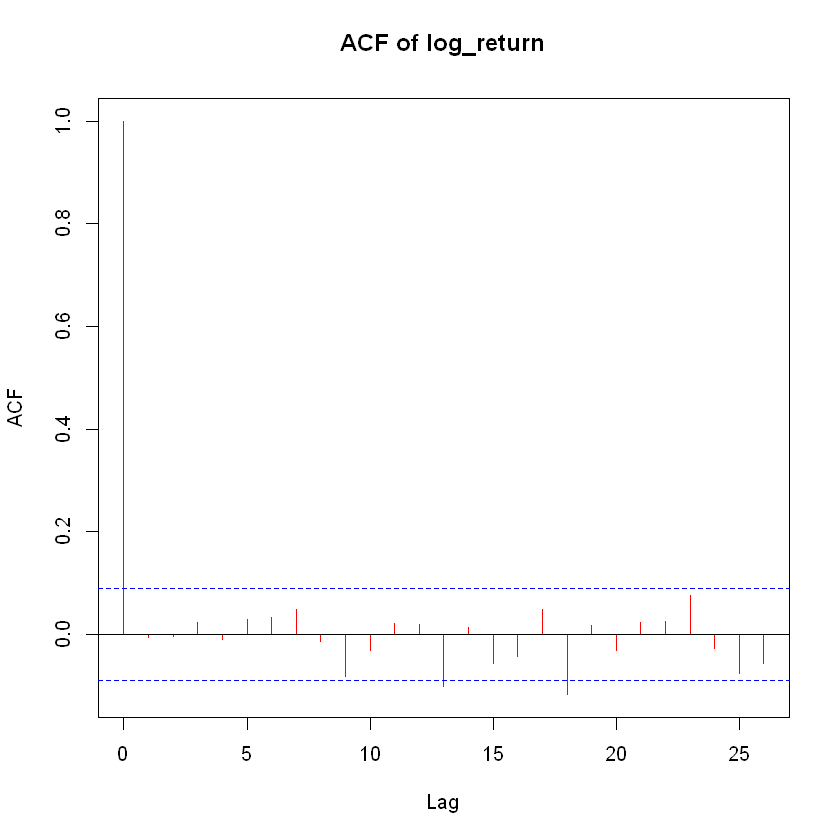


	Box-Ljung test

data:  log_return
X-squared = 6.6755, df = 12, p-value = 0.8783


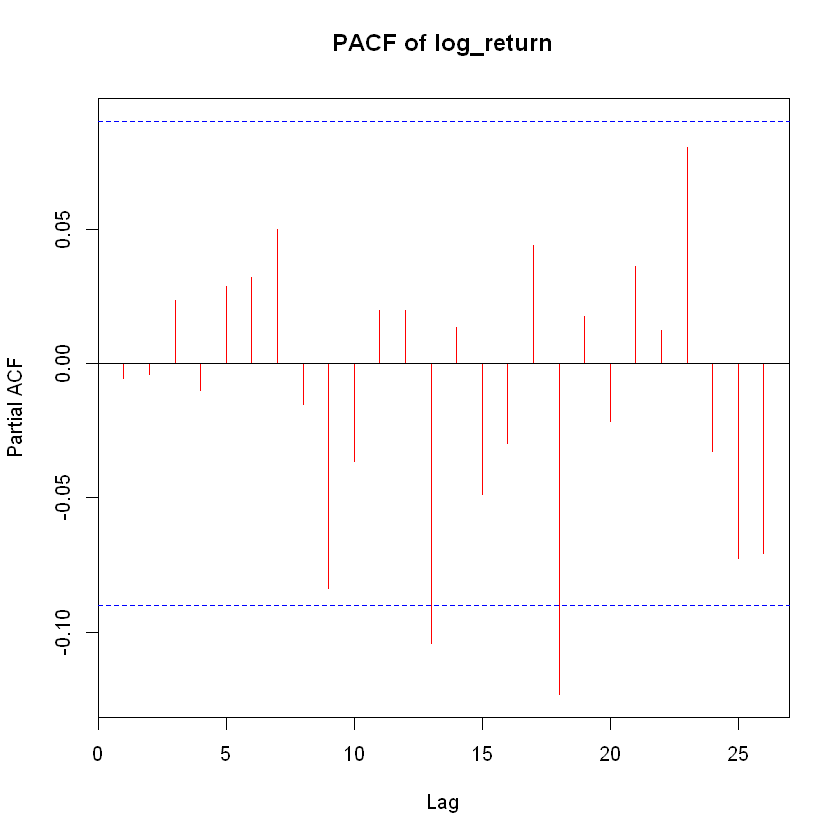

In [15]:
# check serial corr
acf(log_return, main="ACF of log_return", col="red")
pacf(log_return, main="PACF of log_return", col="red")
Box.test(log_return,lag = 12,type = "Ljung")
####The high p-value in the Box-Ljung test (0.8783) suggests that the series does not exhibit significant autocorrelation at the tested lags. This implies that the daily returns are essentially random, which is a desirable property in financial time series analysis, indicating that the market is efficient and past returns do not predict future returns.


	Box-Ljung test

data:  return_a^2
X-squared = 76.745, df = 12, p-value = 1.717e-11


[1] -0.2111928

[1] 1.965013

[1] -1.965013


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  x
D = 0.076777, p-value = 0.007663
alternative hypothesis: two-sided



	Anderson-Darling test of goodness-of-fit
	Null hypothesis: uniform distribution
	Parameters assumed to be fixed

data:  x
An = Inf, p-value = 1.271e-06


[1] -0.0003523657
[1] 0.01413022
[1] 3.393



	One-sample Kolmogorov-Smirnov test student-t with df=3.39, location=0,
	scale=0.01

data:  x
D = 0.029921, p-value = 0.7919
alternative hypothesis: two-sided



	Anderson-Darling test of goodness-of-fit
	Null hypothesis: Student's t distribution
	with parameter df = 3.393
	Parameters assumed to be fixed

data:  (x - m)/s
An = 0.29391, p-value = 0.9426


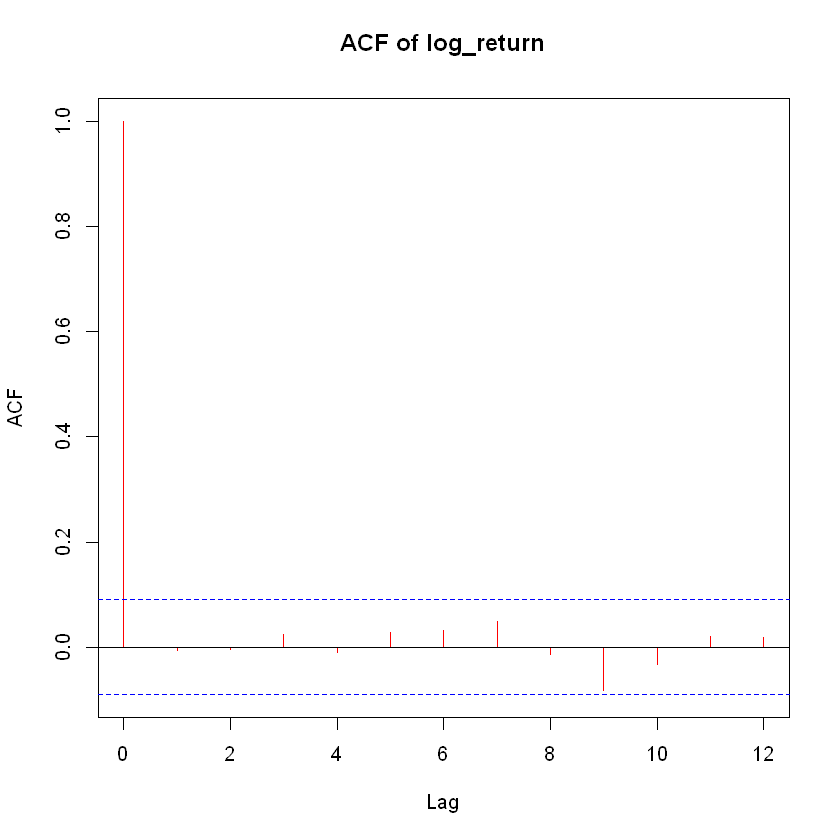

Call:
arima(x = log_return, order = c(0, 0, 0))

Coefficients:
    intercept 
-0.0002036327 

sigma^2 estimated as 0.000437883:  log likelihood = 1155.381,  aic = -2306.762

Call:
arima(x = log_return, order = c(0, 0, 1))

Coefficients:
          ma1     intercept 
-0.0054350694 -0.0002037045 

sigma^2 estimated as 0.0004378701:  log likelihood = 1155.388,  aic = -2304.776

Call:
arima(x = log_return, order = c(1, 0, 0))

Coefficients:
         ar1    intercept 
-0.005393165 -0.000203817 

sigma^2 estimated as 0.0004378702:  log likelihood = 1155.388,  aic = -2304.776

Call:
arima(x = log_return, order = c(1, 0, 1))

Coefficients:
          ar1           ma1     intercept 
 0.6961518879 -0.6914271307 -0.0002023546 

sigma^2 estimated as 0.0004378635:  log likelihood = 1155.391,  aic = -2302.783

Model 1 :
data:  est_a_list[[1]]$residuals
X-squared = 6.6755, df = 12, p-value = 0.8783

Model 2 :
data:  est_a_list[[2]]$residuals
X-squared = 6.702, df = 12, p-value = 0.8767

Model 3 :
data


	Box-Ljung test

data:  res_sGARCH11
X-squared = 6.1001, df = 12, p-value = 0.9109



	Box-Ljung test

data:  res_sGARCH11^2
X-squared = 12.93, df = 12, p-value = 0.3742


[1] 0.9109498
[1] 0.3741718
[1] -5.091906
[1] -5.065485

Title:
 GARCH Modelling 

Call:
 garchFit(formula = w2 ~ arma(0, 0) + garch(2, 1), data = log_return, 
    cond.dist = c("std"), include.mean = FALSE, trace = F) 

Mean and Variance Equation:
 data ~ arma(0, 0) + garch(2, 1)
<environment: 0x000001a3a4f14a70>
 [data = log_return]

Conditional Distribution:
 std 

Coefficient(s):
     omega      alpha1      alpha2       beta1       shape  
2.5158e-05  8.2086e-02  2.0402e-02  8.4879e-01  4.0028e+00  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
omega  2.516e-05   1.517e-05    1.658   0.0972 .  
alpha1 8.209e-02   5.736e-02    1.431   0.1524    
alpha2 2.040e-02   6.628e-02    0.308   0.7582    
beta1  8.488e-01   5.928e-02   14.319  < 2e-16 ***
shape  4.003e+00   7.820e-01    5.119 3.08e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 1210.407    normalized:  2.564423 

Description:
 


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: iGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.000018    0.000013   1.4291 0.152989
alpha1  0.131985    0.044140   2.9902 0.002788
beta1   0.868015          NA       NA       NA
shape   3.364628    0.484632   6.9426 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.000018    0.000012   1.5175 0.129133
alpha1  0.131985    0.041735   3.1625 0.001564
beta1   0.868015          NA       NA       NA
shape   3.364628    0.477204   7.0507 0.000000

LogLikelihood : 1209.397 

Information Criteria
------------------------------------
                    
Akaike       -5.1119
Bayes        -5.0854
Shibata      -5.1119
Hannan-Quinn -5.1015

Weigh


	Box-Ljung test

data:  res_iGARCH11
X-squared = 5.4211, df = 12, p-value = 0.9424



	Box-Ljung test

data:  res_iGARCH11^2
X-squared = 6.9851, df = 12, p-value = 0.8586


[1] 0.9424153
[1] 0.8585939
[1] -5.111851
[1] -5.08543



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: iGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.000000          NA       NA       NA
alpha1  0.062633    0.018193   3.4426 0.000576
beta1   0.937367          NA       NA       NA
shape   4.577398    0.651750   7.0232 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.000000          NA       NA       NA
alpha1  0.062633    0.023525   2.6624 0.007759
beta1   0.937367          NA       NA       NA
shape   4.577398    0.635759   7.1999 0.000000

LogLikelihood : 1204.853 

Information Criteria
------------------------------------
                    
Akaike       -5.0968
Bayes        -5.0792
Shibata      -5.0969
Hannan-Quinn -5.0899

Weigh


	Box-Ljung test

data:  res_iGARCH11_2
X-squared = 6.0941, df = 12, p-value = 0.9113



	Box-Ljung test

data:  res_iGARCH11_2^2
X-squared = 12.837, df = 12, p-value = 0.381


[1] 0.9112618
[1] 0.3810042
[1] -5.096835
[1] -5.079221



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: iGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu     -0.001875    0.002588 -0.72428 0.468894
mxreg1  0.078006    0.139860  0.55774 0.577021
omega   0.000018    0.000013  1.43744 0.150593
alpha1  0.131798    0.043637  3.02030 0.002525
beta1   0.868202          NA       NA       NA
shape   3.358705    0.480601  6.98855 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu     -0.001875    0.002619 -0.71565 0.474210
mxreg1  0.078006    0.138766  0.56214 0.574021
omega   0.000018    0.000012  1.52525 0.127197
alpha1  0.131798    0.041201  3.19893 0.001379
beta1   0.868202          NA       NA       NA
shape   3.358705    0.475460  7.06411 0.000000

LogLikel


	Box-Ljung test

data:  res_GarchM11
X-squared = 5.4714, df = 12, p-value = 0.9404



	Box-Ljung test

data:  res_GarchM11^2
X-squared = 7.3886, df = 12, p-value = 0.8309


[1] 0.9403543
[1] 0.8308991
[1] -5.104988
[1] -5.060952



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
omega  -0.466322    0.138794 -3.35981 0.000780
alpha1  0.018313    0.038648  0.47383 0.635620
beta1   0.940140    0.017675 53.18972 0.000000
gamma1  0.224870    0.061612  3.64978 0.000262
shape   4.009385    0.792823  5.05710 0.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
omega  -0.466322    0.074911  -6.22502 0.000000
alpha1  0.018313    0.043355   0.42238 0.672745
beta1   0.940140    0.009193 102.27136 0.000000
gamma1  0.224870    0.060639   3.70833 0.000209
shape   4.009385    0.680338   5.89323 0.000000

LogLikelihood : 1208.548 

Information Criteria
------------------------------------
           


	Box-Ljung test

data:  res_eGARCH11
X-squared = 5.4906, df = 12, p-value = 0.9396



	Box-Ljung test

data:  res_eGARCH11^2
X-squared = 7.2658, df = 12, p-value = 0.8396


[1] 0.9395579
[1] 0.8395596
[1] -5.099779
[1] -5.055743



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
omega   -0.46695    0.140583  -3.3215 0.000895
alpha1   0.00000          NA       NA       NA
beta1    0.94007    0.017906  52.5004 0.000000
gamma1   0.22480    0.062316   3.6074 0.000309
shape    4.00553    0.790812   5.0651 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
omega   -0.46695    0.078711  -5.9324    0e+00
alpha1   0.00000          NA       NA       NA
beta1    0.94007    0.009743  96.4906    0e+00
gamma1   0.22480    0.057401   3.9162    9e-05
shape    4.00553    0.788105   5.0825    0e+00

LogLikelihood : 1208.435 

Information Criteria
------------------------------------
                 


	Box-Ljung test

data:  res_eGARCH11_2
X-squared = 5.494, df = 12, p-value = 0.9394



	Box-Ljung test

data:  res_eGARCH11_2^2
X-squared = 6.8253, df = 12, p-value = 0.8689


[1] 0.9394154
[1] 0.8689412
[1] -5.103539
[1] -5.068311



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: gjrGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.000023    0.000013  1.75424 0.079389
alpha1  0.107979    0.047617  2.26766 0.023350
beta1   0.859452    0.047150 18.22786 0.000000
gamma1 -0.023775    0.051060 -0.46562 0.641486
shape   4.003675    0.782782  5.11467 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.000023    0.000011  2.12903 0.033252
alpha1  0.107979    0.032837  3.28834 0.001008
beta1   0.859452    0.037171 23.12142 0.000000
gamma1 -0.023775    0.051744 -0.45947 0.645898
shape   4.003675    0.682950  5.86232 0.000000

LogLikelihood : 1210.47 

Information Criteria
------------------------------------
                


	Box-Ljung test

data:  res_gjrGARCH11
X-squared = 5.3292, df = 12, p-value = 0.9461



	Box-Ljung test

data:  res_gjrGARCH11^2
X-squared = 6.3831, df = 12, p-value = 0.8956


[1] 0.9460721
[1] 0.8955536
[1] -5.107924
[1] -5.063889



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: gjrGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
omega    0.00000          NA       NA       NA
alpha1   0.06133    0.019485   3.1475 0.001647
beta1    0.93767    0.018080  51.8615 0.000000
gamma1   0.00000          NA       NA       NA
shape    4.64853    0.801023   5.8032 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
omega    0.00000          NA       NA       NA
alpha1   0.06133    0.022976   2.6693 0.007601
beta1    0.93767    0.023060  40.6621 0.000000
gamma1   0.00000          NA       NA       NA
shape    4.64853    0.759776   6.1183 0.000000

LogLikelihood : 1204.69 

Information Criteria
------------------------------------
                


	Box-Ljung test

data:  res_gjrGARCH11_2
X-squared = 6.1001, df = 12, p-value = 0.9109



	Box-Ljung test

data:  res_gjrGARCH11_2^2
X-squared = 12.93, df = 12, p-value = 0.3742


[1] 0.9109498
[1] 0.3741718
[1] -5.091906
[1] -5.065485



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: apARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.000000    0.000002  0.24375 0.807424
alpha1  0.050470    0.027855  1.81187 0.070006
beta1   0.862992    0.065641 13.14723 0.000000
gamma1 -0.088696    0.113606 -0.78073 0.434960
delta   3.004065    0.166461 18.04667 0.000000
shape   4.210667    1.011156  4.16421 0.000031

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
omega   0.000000    0.000024  0.016629  0.98673
alpha1  0.050470    0.250127  0.201776  0.84009
beta1   0.862992    0.582040  1.482703  0.13815
gamma1 -0.088696    0.187387 -0.473329  0.63598
delta   3.004065    0.497115  6.043003  0.00000
shape   4.210667    7.930282  0.530961  0.59545

L


	Box-Ljung test

data:  res_apARCH11
X-squared = 4.8479, df = 12, p-value = 0.9629



	Box-Ljung test

data:  res_apARCH11^2
X-squared = 5.5615, df = 12, p-value = 0.9366


[1] 0.9628682
[1] 0.9365567
[1] -5.106182
[1] -5.053339


Warning message:
"unidentified option(s) in mean.model:
 distribution.model"



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: csGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
omega   0.000016    0.000002   6.76965 0.000000
alpha1  0.000000    0.023189   0.00000 1.000000
beta1   0.067180    0.385025   0.17448 0.861487
eta11   0.963384    0.005540 173.90797 0.000000
eta21   0.067179    0.018148   3.70168 0.000214

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
omega   0.000016    0.000003   6.26810 0.000000
alpha1  0.000000    0.028824   0.00000 1.000000
beta1   0.067180    0.217135   0.30939 0.757024
eta11   0.963384    0.005567 173.05474 0.000000
eta21   0.067179    0.022375   3.00239 0.002679

LogLikelihood : 1178.266 

Information Criteria
------------------------------------
   


	Box-Ljung test

data:  res_csGARCH11
X-squared = 5.1304, df = 12, p-value = 0.9535



	Box-Ljung test

data:  res_csGARCH11^2
X-squared = 6.371, df = 12, p-value = 0.8962


[1] 0.9534793
[1] 0.8962367
[1] -4.971466
[1] -4.92743


Warning message:
"unidentified option(s) in mean.model:
 distribution.model"



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: fiGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.000009    0.000007   1.2890 0.197388
alpha1  0.230577    0.121183   1.9027 0.057077
beta1   0.762327    0.090543   8.4195 0.000000
delta   0.580966    0.188847   3.0764 0.002095

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.000009    0.000011  0.78988 0.429597
alpha1  0.230577    0.150507  1.53200 0.125523
beta1   0.762327    0.110472  6.90061 0.000000
delta   0.580966    0.262623  2.21217 0.026955

LogLikelihood : 1178.281 

Information Criteria
------------------------------------
                    
Akaike       -4.9758
Bayes        -4.9405
Shibata      -4.9759
Hannan-Quinn -4.9619

Wei


	Box-Ljung test

data:  res_fiGARCH11
X-squared = 5.3609, df = 12, p-value = 0.9448



	Box-Ljung test

data:  res_fiGARCH11^2
X-squared = 7.1113, df = 12, p-value = 0.8502


[1] 0.9448244
[1] 0.8501726
[1] -4.975767
[1] -4.940538



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: fiGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
omega    0.00000          NA       NA       NA
alpha1   0.27576     0.10822   2.5483 0.010826
beta1    0.63241     0.12703   4.9783 0.000001
delta    0.42465     0.12706   3.3420 0.000832
shape    4.61411     0.66385   6.9505 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
omega    0.00000          NA       NA       NA
alpha1   0.27576    0.084091   3.2793 0.001041
beta1    0.63241    0.100263   6.3075 0.000000
delta    0.42465    0.096184   4.4150 0.000010
shape    4.61411    0.669154   6.8954 0.000000

LogLikelihood : 1208.654 

Information Criteria
------------------------------------
                


	Box-Ljung test

data:  res_fiGARCH11_2
X-squared = 5.6318, df = 12, p-value = 0.9335



	Box-Ljung test

data:  res_fiGARCH11_2^2
X-squared = 7.9747, df = 12, p-value = 0.7871


[1] 0.9334953
[1] 0.787105
[1] -5.104468
[1] -5.069239


Done!

Summarizing posterior draws...




Summary of 'svdraws' object

Prior distributions:
mu        ~ Normal(mean = -0.0002036327, sd = 0.01)
(phi+1)/2 ~ Beta(a = 5, b = 1.5)
sigma^2   ~ Gamma(shape = 0.5, rate = 0.5)
nu        ~ Infinity
rho       ~ Constant(value = 0)

Stored 10000 MCMC draws after a burn-in of 1000.
No thinning.

Posterior draws of SV parameters (thinning = 1):
              mean      sd     5%     50%   95%   ESS
mu        -0.00019 0.01000 -0.017 -0.0001 0.016 10000
phi        0.99884 0.00083  0.997  0.9990 1.000   638
sigma      0.24493 0.05606  0.163  0.2401 0.345   101
exp(mu/2)  0.99992 0.00500  0.992  0.9999 1.008 10000
sigma^2    0.06313 0.02935  0.026  0.0577 0.119   101


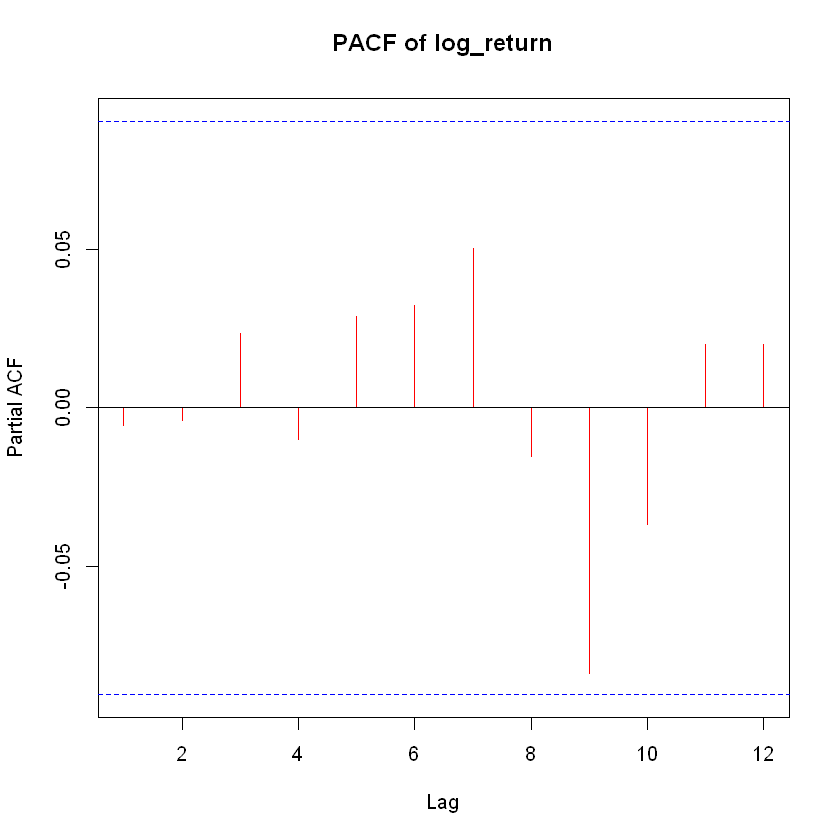

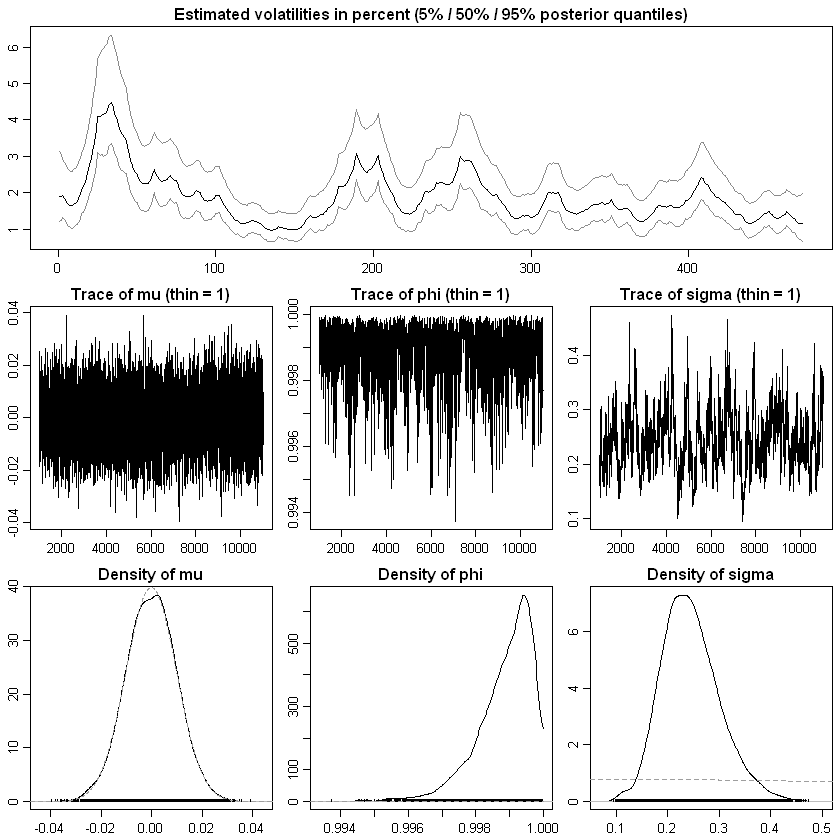

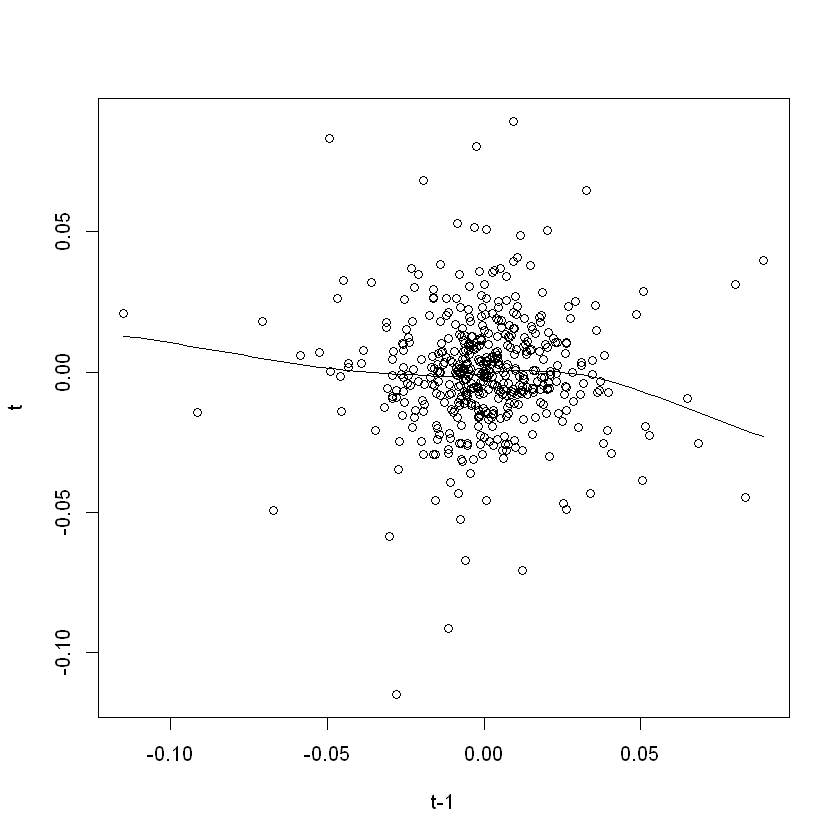

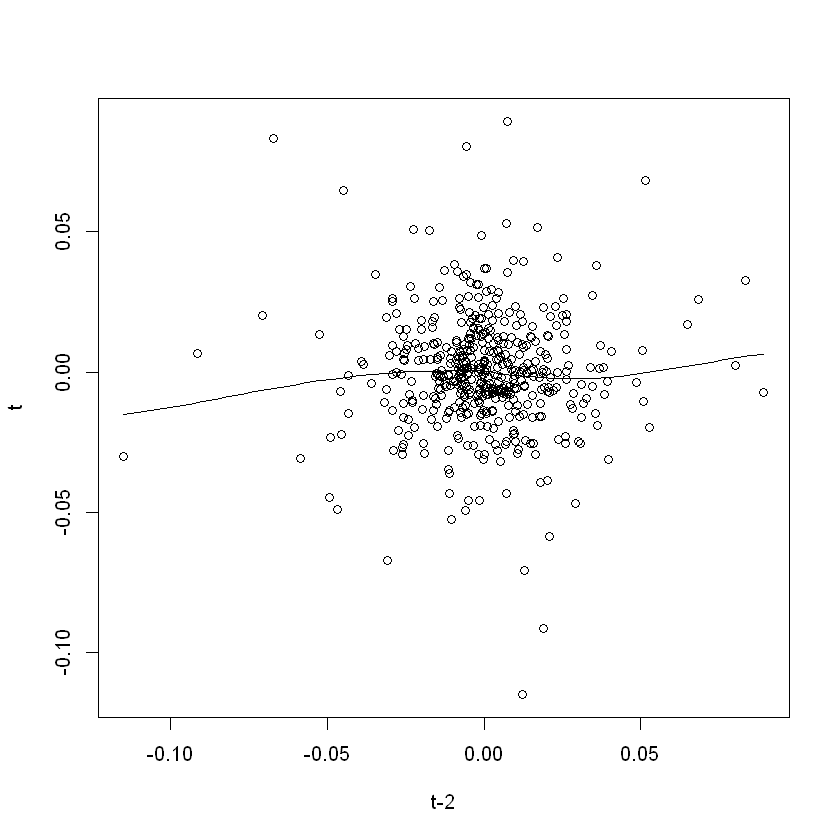

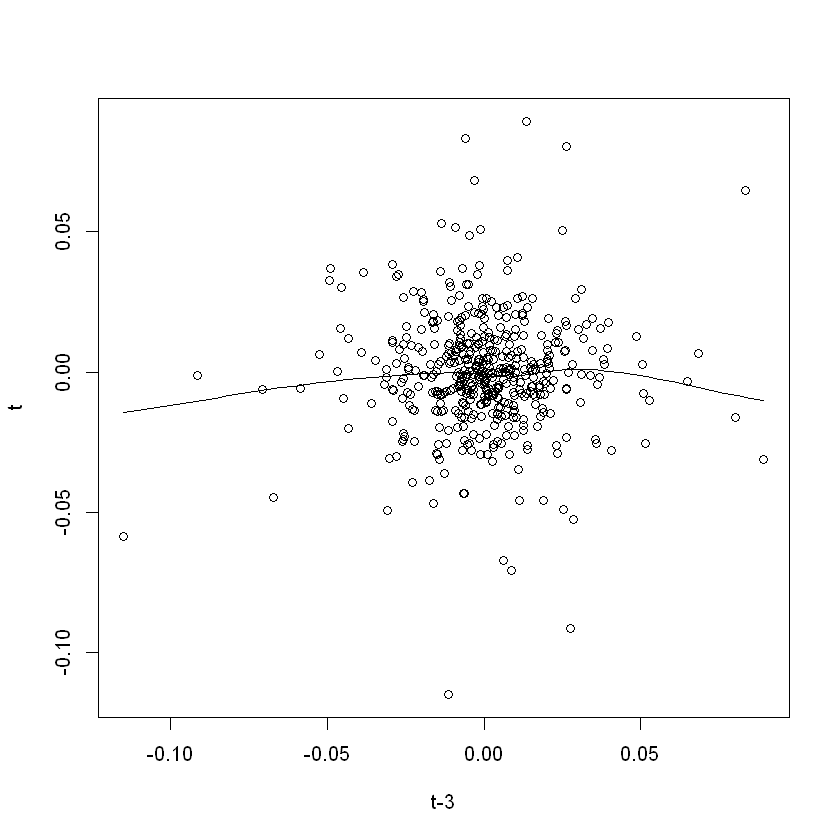

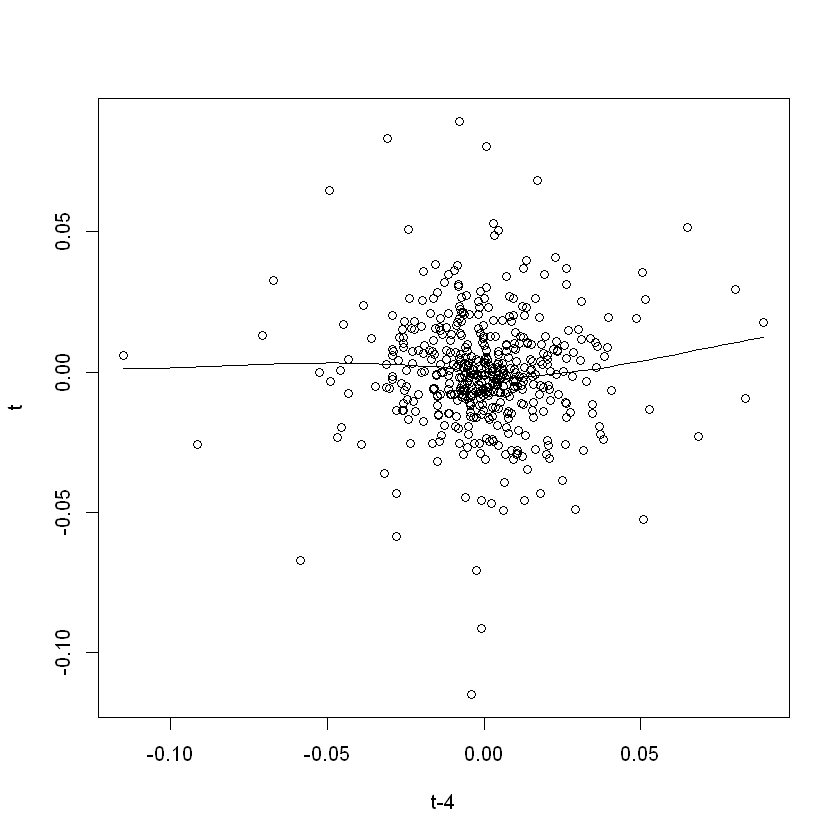

$time.lag
 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21

$mutual.information
 [1] 1.12641073 0.03464688 0.04328862 0.05387460 0.05345080 0.06194670
 [7] 0.05151423 0.05197102 0.04592262 0.05696224 0.05766756 0.04987268
[13] 0.03164746 0.03616621 0.03751093 0.03177463 0.02760666 0.02567029
[19] 0.04414309 0.03515286 0.03453222 0.03121671

$units
[1] "Nats"

$n.partitions
[1] 7

attr(,"class")
[1] "mutualInf"

SETAR model is entertained 
Threshold nonlinearity test for (p,d):  1 1 
F-ratio and p-value:  2.434543 0.08884773 
p =  1  d =  1  F-ratio =  2.434543  P-value =  0.08884773 
SETAR model is entertained 
Threshold nonlinearity test for (p,d):  2 1 
F-ratio and p-value:  1.822489 0.1423263 
p =  2  d =  1  F-ratio =  1.822489  P-value =  0.1423263 
SETAR model is entertained 
Threshold nonlinearity test for (p,d):  3 1 
F-ratio and p-value:  1.27214 0.2801686 
p =  3  d =  1  F-ratio =  1.27214  P-value =  0.2801686 
SETAR model is entertained 
Threshold nonlinearity test for (p,d):  1 2 
F-ratio and p-value:  2.798873 0.06199333 
p =  1  d =  2  F-ratio =  2.798873  P-value =  0.06199333 
SETAR model is entertained 
Threshold nonlinearity test for (p,d):  2 2 
F-ratio and p-value:  1.823731 0.1421006 
p =  2  d =  2  F-ratio =  1.823731  P-value =  0.1421006 
SETAR model is entertained 
Threshold nonlinearity test for (p,d):  3 2 
F-ratio and p-value:  1.620607 0.1680586 
p =  3  d =  


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: fiGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
omega    0.00000          NA       NA       NA
alpha1   0.27576     0.10822   2.5483 0.010826
beta1    0.63241     0.12703   4.9783 0.000001
delta    0.42465     0.12706   3.3420 0.000832
shape    4.61411     0.66385   6.9505 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
omega    0.00000          NA       NA       NA
alpha1   0.27576    0.084091   3.2793 0.001041
beta1    0.63241    0.100263   6.3075 0.000000
delta    0.42465    0.096184   4.4150 0.000010
shape    4.61411    0.669154   6.8954 0.000000

LogLikelihood : 1208.654 

Information Criteria
------------------------------------
                


	Box-Ljung test

data:  res_fiGARCH11_2
X-squared = 5.6318, df = 12, p-value = 0.9335



	Box-Ljung test

data:  res_fiGARCH11_2^2
X-squared = 7.9747, df = 12, p-value = 0.7871


[1] 0.9334953
[1] 0.787105
[1] -5.104468
[1] -5.069239


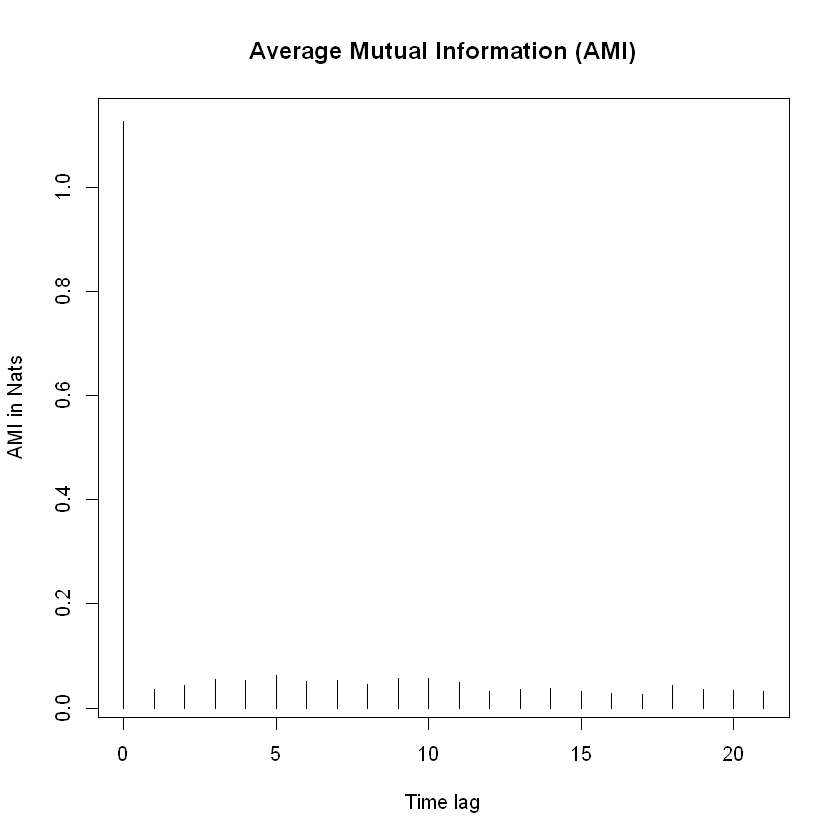

In [43]:
# check ARCH effect
return_a =log_return-mean(log_return)
Box.test(return_a^2,lag=12,type="Ljung")
#### 1.717e-11
#### The significant Box-Ljung test statistic and the extremely low p-value strongly suggest that there is autocorrelation present in the squared returns. This is typically indicative of an ARCH (Autoregressive Conditional Heteroskedasticity) effect, where the volatility (variance of returns) changes over time in a predictable pattern, often responding to shifts in the market or external factors.

# check with constanst term or not
n <- length(log_return)
t <- mean(log_return)/(sd(log_return) / sqrt(n))
upper_qt <- qt(0.975, n-1, lower.tail = TRUE, log.p = FALSE)
lower_qt <- qt(0.025, n-1, lower.tail = TRUE, log.p = FALSE)
t # -0.2111928
upper_qt # 1.965013
lower_qt # -1.965013
#### There is no statistically significant evidence that the mean return differs from zero. This suggests that including a constant term in a model for log_return might not be necessary if the aim is to model the mean of the returns.

# checking Distribution
x<-log_return+0.00000000000000000000000001*rnorm(length(log_return),0,1)
ks.test(x,"pnorm",mean=mean(x),sd=sd(x))
library(nortest)
ad.test(x)
#Anderson-Darling test of goodness-of-fit
#Null hypothesis: uniform distribution
#Parameters assumed to be fixed
#data:  x
#An = Inf, p-value = 1.271e-06

library("Rfast")
library("ramify")
library("LambertW")
x<-as.matrix(x)
df=seq(2,8,0.001)       #set the range of degree of freedom (e.g. df=[2,2.001,...,8])
n=length(df)            
loglik=rep(0,n)         #Used to store the value of loglikelihood function for different level of df
for(i in 1:n){
  fitres=mvt.mle(x,v=df[i])
  loglik[i]=fitres$loglik
}                   #For each df, calculate the MLE and loglikelihood function
loglik<-as.matrix(loglik)
dfmax=df[argmax(loglik,rows=FALSE)] #Find the maximizier(optimal df)
fitMLE=mvt.mle(x,v=dfmax) #Estimate the MLE of the parameters
m<-fitMLE$location            #m=mu (location)
s<-sqrt(fitMLE$scatter[1,1])  #s=lambda (scale parameter)
print(m)# -0.0003523657
print(s)# 0.01413022
print(dfmax)# 3.393

ks_test_t(x,c(location=m,scale=s,df=dfmax)) #do the testing using ks.test
# One-sample Kolmogorov-Smirnov test student-t with df=3.39, location=0, scale=0.01
# data:  x
# D = 0.029921, p-value = 0.7919
# alternative hypothesis: two-sided

library("goftest")
ad.test((x-m)/s,null="pt",df=dfmax)
# Anderson-Darling test of goodness-of-fit
# Null hypothesis: Student's t distribution
# 	with parameter df = 3.393
# 	Parameters assumed to be fixed
# data:  (x - m)/s
# An = 0.29391, p-value = 0.9426

# t-dist

# choose p&q and P&Q
#### no P&Q
acf(log_return,lag=12, main="ACF of log_return", col="red")
pacf(log_return,lag=12, main="PACF of log_return", col="red")

# fit model
#### ARIMA(0,0,0), ARIMA(1,0,1), ARIMA(0,0,1), ARIMA(1,0,0)
p_values <- 0:1
d_value <- 0
q_values <- 0:1 

return_list <- list()
model_index <- 1

for (p in p_values) {
  for (q in q_values) {
    if ((p == 1 && q == 1) || (p == 0 && q == 1) || (p == 1 && q == 0) || (p == 0 && q == 0)) {
      model <- arima(x = log_return, order = c(p, d_value, q))
      return_list[[model_index]] <- model
      model_index <- model_index + 1
      
      cat("Call:\n")
      cat(paste("arima(x = log_return, order = c(", p, ", ", d_value, ", ", q, "))\n", sep=""))
      cat("\nCoefficients:\n")
      print(coef(summary(model)))
      cat("\nsigma^2 estimated as ", model$sigma2,
          ":  log likelihood = ", logLik(model),
          ",  aic = ", AIC(model), "\n\n", sep="")
    }
  }
}

# model checking
# Perform the Ljung-Box test on the residuals of the fitted ARIMA model
ljung_box_results <- vector("list", length(return_list))
for (i in 1:length(return_list)) {
  ljung_box_results[[i]] <- Box.test(return_list[[i]]$residuals, lag = 12, type = "Ljung-Box")
  cat(paste("Model", i, ":\n"))
  cat(paste("data:  est_a_list[[", i, "]]$residuals\n", sep = ""))
  cat(paste("X-squared = ", round(ljung_box_results[[i]]$statistic, 4), ", df = ", ljung_box_results[[i]]$parameter, ", p-value = ", round(ljung_box_results[[i]]$p.value, 4), "\n\n", sep = ""))
}
###Given that the p-value is much higher than the common significance levels 0.05, we would not reject the null hypothesis at these levels. This suggests that the model has adequately captured the time series' structure and that the residuals are behaving like white noise.

# model selection
min_aic <- Inf
min_bic <- Inf
min_aic_index <- NA
min_bic_index <- NA

# Loop through each model to calculate and print AIC and BIC
for (i in 1:length(return_list)) {
  current_aic <- AIC(return_list[[i]])
  current_bic <- BIC(return_list[[i]])
  cat(sprintf("Model %d: AIC = %f, BIC = %f\n", i, current_aic, current_bic))
  if (current_aic < min_aic) {
    min_aic <- current_aic
    min_aic_index <- i
  }
  if (current_bic < min_bic) {
    min_bic <- current_bic
    min_bic_index <- i
  }
}
cat(sprintf("Model with the smallest AIC is Model %d with AIC = %f\n", min_aic_index, min_aic))
cat(sprintf("Model with the smallest BIC is Model %d with BIC = %f\n", min_bic_index, min_bic))
# We choose model_1: ARIMA(0, 0, 0)

# fit model & model checking
# GARCH(1,1) - std
library("fGarch")
garch11 =garchFit(w2~arma(0,0)+garch(1,1),data=log_return,include.mean = FALSE,trace=F,cond.dist = c("std"))
summary(garch11)
# Estimate  Std. Error  t value Pr(>|t|)    
# omega  2.353e-05   1.341e-05    1.755  0.07932 .  
# alpha1 9.628e-02   3.722e-02    2.587  0.00969 ** 
# beta1  8.581e-01   4.802e-02   17.871  < 2e-16 ***
# shape  4.001e+00   7.821e-01    5.115 3.13e-07 ***
res_garch11=residuals(garch11,standardize=T)
test1_garch11 <- Box.test(res_garch11, lag = 12, type = "Ljung")
test2_garch11 <- Box.test(res_garch11^2, lag = 12, type = "Ljung")
print(test1_garch11)
# Box-Ljung test
# data:  res_garch11
# X-squared = 5.3604, df = 12, p-value = 0.9448
print(test2_garch11)
# Box-Ljung test
# data:  res_garch11^2
# X-squared = 6.2108, df = 12, p-value = 0.9051
pv1_garch11=1-pchisq(test1_garch11$statistic,12)
pv2_garch11=1-pchisq(test2_garch11$statistic,12)
print(unname(pv1_garch11)) # 0.944846
print(unname(pv2_garch11)) # 0.9050843
aic_garch11 <- garch11@fit$ics["AIC"]
bic_garch11 <- garch11@fit$ics["BIC"]
print(aic_garch11) # -5.111698  
print(bic_garch11) # -5.07647 


# s-Garch(1,1)
# without omega
library(rugarch)
# Define Garch Model and assume omega=0
spec_sGARCH11 <- ugarchspec(variance.model = list(model = "sGARCH", 
                                                  garchOrder = c(1, 1), 
                                                  submodel = NULL, 
                                                  external.regressors = NULL, 
                                                  variance.targeting = FALSE), 
                            mean.model = list(armaOrder = c(0, 0), 
                                              include.mean = F), 
                            fixed.pars = list(omega = 0),distribution.model="std")
model_sGARCH11 <- ugarchfit(spec = spec_sGARCH11, data = log_return)
show(model_sGARCH11)
# Estimate  Std. Error  t value Pr(>|t|)
# omega    0.00000          NA       NA       NA
# alpha1   0.06133    0.019485   3.1475 0.001647
# beta1    0.93767    0.018080  51.8615 0.000000
# shape    4.64853    0.801023   5.8032 0.000000
res_sGARCH11=residuals(model_sGARCH11,standardize=T)
test1_sGARCH11 = Box.test(res_sGARCH11,12,type="Ljung")
test2_sGARCH11 = Box.test(res_sGARCH11^2,12,type="Ljung")
test1_sGARCH11
# Box-Ljung test
# data:  res_sGARCH11
# X-squared = 6.1001, df = 12, p-value = 0.9109
test2_sGARCH11
# Box-Ljung test
# data:  res_sGARCH11^2
# X-squared = 12.93, df = 12, p-value = 0.3742
pv1_sGARCH11=1-pchisq(test1_sGARCH11$statistic,12)
pv2_sGARCH11=1-pchisq(test2_sGARCH11$statistic,12)
print(unname(pv1_sGARCH11)) # 0.9109498
print(unname(pv2_sGARCH11)) # 0.3741718
aic_sGARCH11 = infocriteria(model_sGARCH11)[1]
bic_sGARCH11 = infocriteria(model_sGARCH11)[2]
print(aic_sGARCH11) # -5.091906
print(bic_sGARCH11) # -5.065485


# GARCH(2,1) - std
garch21 =garchFit(w2~arma(0,0)+garch(2,1),data=log_return,include.mean = FALSE,trace=F,cond.dist = c("std"))
summary(garch21)
# Estimate  Std. Error  t value Pr(>|t|)    
# omega  2.516e-05   1.517e-05    1.658   0.0972 .  
# alpha1 8.209e-02   5.736e-02    1.431   0.1524    
# alpha2 2.040e-02   6.628e-02    0.308   0.7582    
# beta1  8.488e-01   5.928e-02   14.319  < 2e-16 ***
# shape  4.003e+00   7.820e-01    5.119 3.08e-07 ***
res_garch21=residuals(garch21,standardize=T)
test1_garch21 <- Box.test(res_garch21, lag = 12, type = "Ljung")
test2_garch21 <- Box.test(res_garch21^2, lag = 12, type = "Ljung")
print(test1_garch21)
# Box-Ljung test
# data:  res_garch21
# X-squared = 5.3485, df = 12, p-value = 0.9453
print(test2_garch21)
# Box-Ljung test
# data:  res_garch21^2
# X-squared = 6.1568, df = 12, p-value = 0.908
pv1_garch21=1-pchisq(test1_garch21$statistic,12)
pv2_garch21=1-pchisq(test2_garch21$statistic,12)
print(unname(pv1_garch21)) # 0.9453167
print(unname(pv2_garch21)) # 0.9079721
aic_garch21 <- garch21@fit$ics["AIC"]
bic_garch21 <- garch21@fit$ics["BIC"]
print(aic_garch21) # -5.107659  
print(bic_garch21) # -5.063623  
# alpha1 and alpha2 are not statistically significant, especially the contribution of alpha2 is almost negligible, abandon the model


# GARCH(1,2) - std
garch12 =garchFit(w2~arma(0,0)+garch(1,2),data=log_return,include.mean = FALSE,trace=F,cond.dist = c("std"))
summary(garch12)
# Estimate  Std. Error  t value Pr(>|t|)    
# omega  2.355e-05   2.986e-05    0.789    0.430    
# alpha1 9.644e-02   1.200e-01    0.804    0.421    
# beta1  8.579e-01   1.667e+00    0.515    0.607    
# beta2  1.000e-08   1.500e+00    0.000    1.000    
# shape  3.997e+00   7.819e-01    5.111 3.21e-07 ***
res_garch12=residuals(garch12,standardize=T)
test1_garch12 <- Box.test(res_garch12, lag = 12, type = "Ljung")
test2_garch12 <- Box.test(res_garch12^2, lag = 12, type = "Ljung")
print(test1_garch12)
# Box-Ljung test
# data:  res_garch12
# X-squared = 5.3696, df = 12, p-value = 0.9445
print(test2_garch12)
# Box-Ljung test
# data:  res_garch12^2
# X-squared = 6.2131, df = 12, p-value = 0.905
pv1_garch12=1-pchisq(test1_garch12$statistic,12)
pv2_garch12=1-pchisq(test2_garch12$statistic,12)
print(unname(pv1_garch12))# 0.9444828
print(unname(pv2_garch12))# 0.9049597
aic_garch12 <- garch12@fit$ics["AIC"]
bic_garch12 <- garch12@fit$ics["BIC"]
print(aic_garch12)# -5.107466  
print(bic_garch12)# -5.06343 
# alpha and beta are not statistically significant, especially the contribution of alpha2 is almost negligible, abandon the model


# ARCH(1)+ARMA(0,0) ( GARCH(1,0)+ARMA(0,0))
garch10 = garchFit(sample~arma(0,0)+garch(1,0),data=log_return,trace=F,include.mean=F,cond.dist="std")
summary(garch10)
# Estimate  Std. Error  t value Pr(>|t|)    
# omega  4.087e-04   7.689e-05    5.316 1.06e-07 ***
# alpha1 1.708e-01   9.022e-02    1.893   0.0584 .  
# shape  3.498e+00   6.276e-01    5.574 2.49e-08 ***
res_garch10=residuals(garch10,standardize=T)
test1_garch10 <- Box.test(res_garch10, lag = 12, type = "Ljung")
test2_garch10 <- Box.test(res_garch10^2, lag = 12, type = "Ljung")
print(test1_garch10)
# Box-Ljung test
# data:  res_garch10
# X-squared = 7.5093, df = 12, p-value = 0.8222
print(test2_garch10)
# Box-Ljung test
# data:  res_garch10^2
# X-squared = 35.23, df = 12, p-value = 0.0004304
pv1_garch10=1-pchisq(test1_garch10$statistic,12)
pv2_garch10=1-pchisq(test2_garch10$statistic,12)
print(unname(pv1_garch10))# 0.822209
print(unname(pv2_garch10))# 0.0004304366
aic_garch10 <- garch10@fit$ics["AIC"]
bic_garch10 <- garch10@fit$ics["BIC"]
print(aic_garch10)# -5.062853 
print(bic_garch10)# -5.036431 
# can't pass


# ARCH(2)+ARMA(0,0)
#GARCH(2,0)+ARMA(0,0)=ARCH(2)
garch20=garchFit(sample~arma(0,0)+garch(2,0),data=log_return,trace=F,include.mean=F,cond.dist = "std")
summary(garch20)
# Estimate  Std. Error  t value Pr(>|t|)    
# omega  0.0003411   0.0000659    5.176 2.26e-07 ***
# alpha1 0.1334826   0.0770507    1.732   0.0832 .  
# alpha2 0.2045149   0.1111718    1.840   0.0658 .  
# shape  3.5727518   0.6475819    5.517 3.45e-08 ***
res_garch20=residuals(garch20,standardize=T)
test1_garch20 <- Box.test(res_garch20, lag = 12, type = "Ljung")
test2_garch20 <- Box.test(res_garch20^2, lag = 12, type = "Ljung")
print(test1_garch20)
# Box-Ljung test
# data:  res_garch20
# X-squared = 7.2819, df = 12, p-value = 0.8384
print(test2_garch20)
# Box-Ljung test
# data:  res_garch20^2
# X-squared = 12.584, df = 12, p-value = 0.4
pv1_garch20=1-pchisq(test1_garch20$statistic,12)
pv2_garch20=1-pchisq(test2_garch20$statistic,12)
print(unname(pv1_garch20))# 0.8384326
print(unname(pv2_garch20))# 0.4000044
aic_garch20 <- garch20@fit$ics["AIC"]
bic_garch20 <- garch20@fit$ics["BIC"]
print(aic_garch20)# -5.073816  
print(bic_garch20)# -5.038587 
#### alpha insignificant

# ARCH(3)+ARMA(0,0)
# GARCH(3,0)+ARMA(0,0)=ARCH(3)
garch30=garchFit(sample~arma(0,0)+garch(3,0),data=log_return,trace=F,include.mean=FALSE)
summary(garch30)
# Estimate  Std. Error  t value Pr(>|t|)    
# omega  3.219e-04   3.433e-05    9.378   <2e-16 ***
# alpha1 6.921e-02   4.942e-02    1.400   0.1614    
# alpha2 1.192e-01   6.349e-02    1.877   0.0605 .  
# alpha3 7.940e-02   5.949e-02    1.335   0.1820   
res_garch30=residuals(garch30,standardize=T)
test1_garch30 <- Box.test(res_garch30, lag = 12, type = "Ljung")
test2_garch30 <- Box.test(res_garch30^2, lag = 12, type = "Ljung")
print(test1_garch30)
# Box-Ljung test
# data:  res_garch30
# X-squared = 6.4692, df = 12, p-value = 0.8906
print(test2_garch30)
# Box-Ljung test
# data:  res_garch30^2
# X-squared = 14.737, df = 12, p-value = 0.2561
pv1_garch30=1-pchisq(test1_garch30$statistic,12)
pv2_garch30=1-pchisq(test2_garch30$statistic,12)
print(unname(pv1_garch30))# 0.8906126
print(unname(pv2_garch30))# 0.2561099
aic_garch30 <- garch30@fit$ics["AIC"]
bic_garch30 <- garch30@fit$ics["BIC"]
print(aic_garch30)# -4.926262   
print(bic_garch30)# -4.891033 
#### alpha more insignificant



# iGARCH(1,1)
## with omega
spec_iGARCH11<-ugarchspec(variance.model=list(model="iGARCH",garchOrder=c(1,1)),mean.model=list(armaOrder=c(0,0),include.mean=F),distribution.model="std")
model_iGARCH11<-ugarchfit(spec=spec_iGARCH11,data=log_return)
model_iGARCH11
# Estimate  Std. Error  t value Pr(>|t|)
# omega   0.000018    0.000013   1.4291 0.152989
# alpha1  0.131985    0.044140   2.9902 0.002788
# beta1   0.868015          NA       NA       NA
# shape   3.364628    0.484632   6.9426 0.000000
res_iGARCH11=residuals(model_iGARCH11,standardize=T)
test1_iGARCH11 = Box.test(res_iGARCH11,12,type="Ljung")
test2_iGARCH11 = Box.test(res_iGARCH11^2,12,type="Ljung")
test1_iGARCH11
# Box-Ljung test
# data:  res_iGARCH11
# X-squared = 5.4211, df = 12, p-value = 0.9424
test2_iGARCH11
# Box-Ljung test
# data:  res_iGARCH11^2
# X-squared = 6.9851, df = 12, p-value = 0.8586
pv1_iGARCH11=1-pchisq(test1_iGARCH11$statistic,12)
pv2_iGARCH11=1-pchisq(test2_iGARCH11$statistic,12)
print(unname(pv1_iGARCH11)) # 0.9424153
print(unname(pv2_iGARCH11)) # 0.8585939
aic_iGARCH11 = infocriteria(model_iGARCH11)[1]
bic_iGARCH11 = infocriteria(model_iGARCH11)[2]
print(aic_iGARCH11) # -5.111851
print(bic_iGARCH11) # -5.08543

## without omega
spec_iGARCH11_2<-ugarchspec(variance.model=list(model="iGARCH",garchOrder=c(1,1)),mean.model=list(armaOrder=c(0,0),include.mean=F),distribution.model="std",fixed.pars = list(omega = 0))
model_iGARCH11_2<-ugarchfit(spec=spec_iGARCH11_2,data=log_return)
model_iGARCH11_2
# Estimate  Std. Error  t value Pr(>|t|)
# omega   0.000000          NA       NA       NA
# alpha1  0.062633    0.018193   3.4426 0.000576
# beta1   0.937367          NA       NA       NA
# shape   4.577398    0.651750   7.0232 0.000000
res_iGARCH11_2=residuals(model_iGARCH11_2,standardize=T)
test1_iGARCH11_2 = Box.test(res_iGARCH11_2,12,type="Ljung")
test2_iGARCH11_2 = Box.test(res_iGARCH11_2^2,12,type="Ljung")
test1_iGARCH11_2
# Box-Ljung test
# data:  res_iGARCH11_2
# X-squared = 6.0941, df = 12, p-value = 0.9113
test2_iGARCH11_2
# Box-Ljung test
# data:  res_iGARCH11_2^2
# X-squared = 12.837, df = 12, p-value = 0.381
pv1_iGARCH11_2=1-pchisq(test1_iGARCH11_2$statistic,12)
pv2_iGARCH11_2=1-pchisq(test2_iGARCH11_2$statistic,12)
print(unname(pv1_iGARCH11_2)) # 0.9112618
print(unname(pv2_iGARCH11_2)) # 0.3810042
aic_iGARCH11_2 = infocriteria(model_iGARCH11_2)[1]
bic_iGARCH11_2 = infocriteria(model_iGARCH11_2)[2]
print(aic_iGARCH11_2) # -5.096835
print(bic_iGARCH11_2) # -5.079221


# GARCH-M(1,1)+ARMA(0,0)
# with omega
condVar <- sigma(model_iGARCH11_2)
spec_GarchM11 <- ugarchspec(variance.model = list(model = "iGARCH", garchOrder = c(1, 1)),
                            mean.model = list(armaOrder = c(0, 0), include.mean = T, 
                                              external.regressors = matrix(condVar)),
                            distribution.model = "std")
model_GarchM11<-ugarchfit(spec=spec_GarchM11,data=log_return)
model_GarchM11
# Estimate  Std. Error  t value Pr(>|t|)
# mu     -0.001875    0.002588 -0.72428 0.468894
# mxreg1  0.078006    0.139860  0.55774 0.577021
# omega   0.000018    0.000013  1.43744 0.150593
# alpha1  0.131798    0.043637  3.02030 0.002525
# beta1   0.868202          NA       NA       NA
# shape   3.358705    0.480601  6.98855 0.000000
res_GarchM11=residuals(model_GarchM11,standardize=T)
test1_GarchM11 = Box.test(res_GarchM11,12,type="Ljung")
test2_GarchM11 = Box.test(res_GarchM11^2,12,type="Ljung")
test1_GarchM11
# Box-Ljung test
# data:  res_GarchM11
# X-squared = 5.4714, df = 12, p-value = 0.9404
test2_GarchM11
# Box-Ljung test
# data:  res_GarchM11^2
# X-squared = 7.3886, df = 12, p-value = 0.8309
pv1_GarchM11=1-pchisq(test1_GarchM11$statistic,12)
pv2_GarchM11=1-pchisq(test2_GarchM11$statistic,12)
print(unname(pv1_GarchM11)) # 0.9403543
print(unname(pv2_GarchM11)) # 0.8308991
aic_GarchM11 = infocriteria(model_GarchM11)[1]
bic_GarchM11 = infocriteria(model_GarchM11)[2]
print(aic_GarchM11) # -5.104988
print(bic_GarchM11) # -5.060952
# mu, mxreg1 insignificant


# eGARCH(1,1)
# with alpha
spec_eGARCH11=ugarchspec(variance.model=list(model="eGARCH",garchOrder=c(1,1)),mean.model=list(armaOrder=c(0,0),include.mean=FALSE),distribution.model="std")
model_eGARCH11=ugarchfit(spec=spec_eGARCH11,data=log_return)
model_eGARCH11
# Estimate  Std. Error  t value Pr(>|t|)
# omega  -0.466322    0.138794 -3.35981 0.000780
# alpha1  0.018313    0.038648  0.47383 0.635620
# beta1   0.940140    0.017675 53.18972 0.000000
# gamma1  0.224870    0.061612  3.64978 0.000262
# shape   4.009385    0.792823  5.05710 0.000000
res_eGARCH11=residuals(model_eGARCH11,standardize=T)
test1_eGARCH11 = Box.test(res_eGARCH11,12,type="Ljung")
test2_eGARCH11 = Box.test(res_eGARCH11^2,12,type="Ljung")
test1_eGARCH11
# Box-Ljung test
# data:  res_eGARCH11
# X-squared = 5.4906, df = 12, p-value = 0.9396
test2_eGARCH11
# Box-Ljung test
# data:  res_eGARCH11^2
# X-squared = 7.2658, df = 12, p-value = 0.8396
pv1_eGARCH11=1-pchisq(test1_eGARCH11$statistic,12)
pv2_eGARCH11=1-pchisq(test2_eGARCH11$statistic,12)
print(unname(pv1_eGARCH11)) # 0.9395579
print(unname(pv2_eGARCH11)) # 0.8395596
aic_eGARCH11 = infocriteria(model_eGARCH11)[1]
bic_eGARCH11 = infocriteria(model_eGARCH11)[2]
print(aic_eGARCH11) # -5.099779
print(bic_eGARCH11) # -5.055743

# without alpha
spec_eGARCH11_2=ugarchspec(variance.model=list(model="eGARCH",garchOrder=c(1,1)),mean.model=list(armaOrder=c(0,0),include.mean=FALSE),distribution.model="std", fixed.pars = list(alpha1 = 0))
model_eGARCH11_2=ugarchfit(spec=spec_eGARCH11_2,data=log_return)
model_eGARCH11_2
# Estimate  Std. Error  t value Pr(>|t|)
# omega   -0.46695    0.140583  -3.3215 0.000895
# alpha1   0.00000          NA       NA       NA
# beta1    0.94007    0.017906  52.5004 0.000000
# gamma1   0.22480    0.062316   3.6074 0.000309
# shape    4.00553    0.790812   5.0651 0.000000
res_eGARCH11_2=residuals(model_eGARCH11_2,standardize=T)
test1_eGARCH11_2 = Box.test(res_eGARCH11_2,12,type="Ljung")
test2_eGARCH11_2 = Box.test(res_eGARCH11_2^2,12,type="Ljung")
test1_eGARCH11_2
# Box-Ljung test
# data:  res_eGARCH11_2
# X-squared = 5.494, df = 12, p-value = 0.9394
test2_eGARCH11_2
# Box-Ljung test
# data:  res_eGARCH11_2^2
# X-squared = 6.8253, df = 12, p-value = 0.8689
pv1_eGARCH11_2=1-pchisq(test1_eGARCH11_2$statistic,12)
pv2_eGARCH11_2=1-pchisq(test2_eGARCH11_2$statistic,12)
print(unname(pv1_eGARCH11_2)) # 0.9394154
print(unname(pv2_eGARCH11_2)) # 0.8689412
aic_eGARCH11_2 = infocriteria(model_eGARCH11_2)[1]
bic_eGARCH11_2 = infocriteria(model_eGARCH11_2)[2]
print(aic_eGARCH11_2) # -5.103539
print(bic_eGARCH11_2) # -5.068311

# gjrGARCH(1,1)
# with omega&gamma1
spec_gjrGARCH11=ugarchspec(variance.model=list(model="gjrGARCH",garchOrder=c(1,1)),mean.model=list(armaOrder=c(0,0),include.mean=FALSE),distribution.model="std")
model_gjrGARCH11=ugarchfit(spec=spec_gjrGARCH11,data=log_return)
model_gjrGARCH11
# Estimate  Std. Error  t value Pr(>|t|)
# omega   0.000023    0.000013  1.75424 0.079389
# alpha1  0.107979    0.047617  2.26766 0.023350
# beta1   0.859452    0.047150 18.22786 0.000000
# gamma1 -0.023775    0.051060 -0.46562 0.641486
# shape   4.003675    0.782782  5.11467 0.000000
res_gjrGARCH11=residuals(model_gjrGARCH11,standardize=T)
test1_gjrGARCH11 = Box.test(res_gjrGARCH11,12,type="Ljung")
test2_gjrGARCH11 = Box.test(res_gjrGARCH11^2,12,type="Ljung")
test1_gjrGARCH11
# Box-Ljung test
# data:  res_gjrGARCH11
# X-squared = 5.3292, df = 12, p-value = 0.9461
test2_gjrGARCH11
# Box-Ljung test
# data:  res_gjrGARCH11^2
# X-squared = 6.3831, df = 12, p-value = 0.8956
pv1_gjrGARCH11=1-pchisq(test1_gjrGARCH11$statistic,12)
pv2_gjrGARCH11=1-pchisq(test2_gjrGARCH11$statistic,12)
print(unname(pv1_gjrGARCH11)) # 0.9460721
print(unname(pv2_gjrGARCH11)) # 0.8955536
aic_gjrGARCH11 = infocriteria(model_gjrGARCH11)[1]
bic_gjrGARCH11 = infocriteria(model_gjrGARCH11)[2]
print(aic_gjrGARCH11) # -5.107924
print(bic_gjrGARCH11) # -5.063889

# without omega&gamma1
spec_gjrGARCH11_2=ugarchspec(variance.model=list(model="gjrGARCH",garchOrder=c(1,1)),mean.model=list(armaOrder=c(0,0),include.mean=FALSE),distribution.model="std", fixed.pars = list(omega = 0, gamma1=0))
model_gjrGARCH11_2=ugarchfit(spec=spec_gjrGARCH11_2,data=log_return)
model_gjrGARCH11_2
# Estimate  Std. Error  t value Pr(>|t|)
# omega    0.00000          NA       NA       NA
# alpha1   0.06133    0.019485   3.1475 0.001647
# beta1    0.93767    0.018080  51.8615 0.000000
# gamma1   0.00000          NA       NA       NA
# shape    4.64853    0.801023   5.8032 0.000000
res_gjrGARCH11_2=residuals(model_gjrGARCH11_2,standardize=T)
test1_gjrGARCH11_2 = Box.test(res_gjrGARCH11_2,12,type="Ljung")
test2_gjrGARCH11_2 = Box.test(res_gjrGARCH11_2^2,12,type="Ljung")
test1_gjrGARCH11_2
# Box-Ljung test
# data:  res_gjrGARCH11_2
# X-squared = 6.1001, df = 12, p-value = 0.9109
test2_gjrGARCH11_2
# Box-Ljung test
# data:  res_gjrGARCH11_2^2
# X-squared = 12.93, df = 12, p-value = 0.3742
pv1_gjrGARCH11_2=1-pchisq(test1_gjrGARCH11_2$statistic,12)
pv2_gjrGARCH11_2=1-pchisq(test2_gjrGARCH11_2$statistic,12)
print(unname(pv1_gjrGARCH11_2)) # 0.9109498
print(unname(pv2_gjrGARCH11_2)) # 0.3741718
aic_gjrGARCH11_2 = infocriteria(model_gjrGARCH11_2)[1]
bic_gjrGARCH11_2 = infocriteria(model_gjrGARCH11_2)[2]
print(aic_gjrGARCH11_2) # -5.091906
print(bic_gjrGARCH11_2) # -5.065485


# apARCH(1,1)
spec_apARCH11=ugarchspec(variance.model=list(model="apARCH",garchOrder=c(1,1)),mean.model=list(armaOrder=c(0,0),include.mean=FALSE),distribution.model="std")
model_apARCH11=ugarchfit(spec=spec_apARCH11,data=log_return)
model_apARCH11
# Estimate  Std. Error  t value Pr(>|t|)
# omega   0.000000    0.000002  0.24375 0.807424
# alpha1  0.050470    0.027855  1.81187 0.070006
# beta1   0.862992    0.065641 13.14723 0.000000
# gamma1 -0.088696    0.113606 -0.78073 0.434960
# delta   3.004065    0.166461 18.04667 0.000000
# shape   4.210667    1.011156  4.16421 0.000031
res_apARCH11=residuals(model_apARCH11,standardize=T)
test1_apARCH11 = Box.test(res_apARCH11,12,type="Ljung")
test2_apARCH11 = Box.test(res_apARCH11^2,12,type="Ljung")
test1_apARCH11
# Box-Ljung test
# data:  res_apARCH11
# X-squared = 4.8479, df = 12, p-value = 0.9629
test2_apARCH11
# Box-Ljung test
# data:  res_apARCH11^2
# X-squared = 5.5615, df = 12, p-value = 0.9366
pv1_apARCH11=1-pchisq(test1_apARCH11$statistic,12)
pv2_apARCH11=1-pchisq(test2_apARCH11$statistic,12)
print(unname(pv1_apARCH11)) # 0.9628682
print(unname(pv2_apARCH11)) # 0.9365567
aic_apARCH11 = infocriteria(model_apARCH11)[1]
bic_apARCH11 = infocriteria(model_apARCH11)[2]
print(aic_apARCH11)# -5.106182
print(bic_apARCH11)# -5.053339
# alpha,gamma insignificant


# csGARCH(1,1)
spec_csGARCH11=ugarchspec(variance.model = list(model = "csGARCH", garchOrder = c(1,1)),mean.model = list(armaOrder = c(0,0), include.mean = FALSE,distribution.model="std"))
model_csGARCH11=ugarchfit(spec=spec_csGARCH11,data=log_return)
model_csGARCH11
# Estimate  Std. Error   t value Pr(>|t|)
# omega   0.000016    0.000002   6.76965 0.000000
# alpha1  0.000000    0.023189   0.00000 1.000000
# beta1   0.067180    0.385025   0.17448 0.861487
# eta11   0.963384    0.005540 173.90797 0.000000
# eta21   0.067179    0.018148   3.70168 0.000214
res_csGARCH11=residuals(model_csGARCH11,standardize=T)
test1_csGARCH11 = Box.test(res_csGARCH11,12,type="Ljung")
test2_csGARCH11 = Box.test(res_csGARCH11^2,12,type="Ljung")
test1_csGARCH11
# Box-Ljung test
# data:  res_csGARCH11
# X-squared = 5.1304, df = 12, p-value = 0.9535
test2_csGARCH11
# Box-Ljung test
# data:  res_csGARCH11^2
# X-squared = 6.371, df = 12, p-value = 0.8962
pv1_csGARCH11=1-pchisq(test1_csGARCH11$statistic,12)
pv2_csGARCH11=1-pchisq(test2_csGARCH11$statistic,12)
print(unname(pv1_csGARCH11))# 0.9534793
print(unname(pv2_csGARCH11))# 0.8962367
aic_csGARCH11 = infocriteria(model_csGARCH11)[1]
bic_csGARCH11 = infocriteria(model_csGARCH11)[2]
print(aic_csGARCH11)# -4.971466
print(bic_csGARCH11)# -4.92743
# alpha,beta insignificant

# fiGARCH(1,1)
# with omega
spec_fiGARCH11=ugarchspec(variance.model = list(model = "fiGARCH", garchOrder = c(1,1)),mean.model = list(armaOrder = c(0,0), include.mean = FALSE,distribution.model="std"))
model_fiGARCH11=ugarchfit(spec=spec_fiGARCH11,data=log_return)
model_fiGARCH11
# Estimate  Std. Error  t value Pr(>|t|)
# omega   0.000009    0.000007   1.2890 0.197388
# alpha1  0.230577    0.121183   1.9027 0.057077
# beta1   0.762327    0.090543   8.4195 0.000000
# delta   0.580966    0.188847   3.0764 0.002095
res_fiGARCH11=residuals(model_fiGARCH11,standardize=T)
test1_fiGARCH11 = Box.test(res_fiGARCH11,12,type="Ljung")
test2_fiGARCH11 = Box.test(res_fiGARCH11^2,12,type="Ljung")
test1_fiGARCH11
# Box-Ljung test
# data:  res_fiGARCH11
# X-squared = 5.3609, df = 12, p-value = 0.9448
test2_fiGARCH11
# Box-Ljung test
# data:  res_fiGARCH11^2
# X-squared = 7.1113, df = 12, p-value = 0.8502
pv1_fiGARCH11=1-pchisq(test1_fiGARCH11$statistic,12)
pv2_fiGARCH11=1-pchisq(test2_fiGARCH11$statistic,12)
print(unname(pv1_fiGARCH11))# 0.9448244
print(unname(pv2_fiGARCH11))# 0.8501726
aic_fiGARCH11 = infocriteria(model_fiGARCH11)[1]
bic_fiGARCH11 = infocriteria(model_fiGARCH11)[2]
print(aic_fiGARCH11) # -4.975767
print(bic_fiGARCH11) # -4.940538

# without omega
spec_fiGARCH11_2=ugarchspec(variance.model=list(model="fiGARCH",garchOrder=c(1,1)),mean.model=list(armaOrder=c(0,0),include.mean=FALSE),distribution.model="std", fixed.pars = list(omega = 0))
model_fiGARCH11_2=ugarchfit(spec=spec_fiGARCH11_2,data=log_return)
model_fiGARCH11_2
# Estimate  Std. Error  t value Pr(>|t|)
# omega    0.00000          NA       NA       NA
# alpha1   0.27576     0.10822   2.5483 0.010826
# beta1    0.63241     0.12703   4.9783 0.000001
# delta    0.42465     0.12706   3.3420 0.000832
# shape    4.61411     0.66385   6.9505 0.000000
res_fiGARCH11_2=residuals(model_fiGARCH11_2,standardize=T)
test1_fiGARCH11_2 = Box.test(res_fiGARCH11_2,12,type="Ljung")
test2_fiGARCH11_2 = Box.test(res_fiGARCH11_2^2,12,type="Ljung")
test1_fiGARCH11_2
# Box-Ljung test
# data:  res_fiGARCH11_2
# X-squared = 5.6318, df = 12, p-value = 0.9335
test2_fiGARCH11_2
# Box-Ljung test
# data:  res_fiGARCH11_2^2
# X-squared = 7.9747, df = 12, p-value = 0.7871
pv1_fiGARCH11_2=1-pchisq(test1_fiGARCH11_2$statistic,12)
pv2_fiGARCH11_2=1-pchisq(test2_fiGARCH11_2$statistic,12)
print(unname(pv1_fiGARCH11_2))# 0.9334953
print(unname(pv2_fiGARCH11_2))# 0.787105
aic_fiGARCH11_2 = infocriteria(model_fiGARCH11_2)[1]
bic_fiGARCH11_2 = infocriteria(model_fiGARCH11_2)[2]
print(aic_fiGARCH11_2) # -5.104468
print(bic_fiGARCH11_2) # -5.069239

# Stochastic Volatility Model
library(stochvol)
model_sto <- svsample(log_return, priormu = c(mean(log_return), 0.01))
summary(model_sto)
# Posterior draws of SV parameters (thinning = 1):
# mean      sd     5%      50%   95%   ESS
# mu        -0.00024 0.01003 -0.017 -0.00017 0.016 10707
# phi        0.99877 0.00084  0.997  0.99895 1.000   646
# sigma      0.25504 0.05144  0.178  0.25200 0.347   128
# exp(mu/2)  0.99989 0.00501  0.992  0.99992 1.008 10707
# sigma^2    0.06769 0.02780  0.032  0.06350 0.120   128
plot(model_sto)



# Threshold ARIMA
###method 2: scatter-line plot
library("quantmod")
library("tsDyn")
library("stats")
library("nonlinearTseries")
library("datasets")
library("NTS")
{#par(mfrow=c(2,2))
  scatter.smooth(Lag(log_return, 1), log_return, span = 2/3, degree = 1,
                 family = c("symmetric", "gaussian"), evaluation = 50, 
                 xlab = "t-1", ylab = "t")
  scatter.smooth(Lag(log_return, 2), log_return, span = 2/3, degree = 1,
                 family = c("symmetric", "gaussian"), evaluation = 50, 
                 xlab = "t-2", ylab = "t")
  scatter.smooth(Lag(log_return, 3), log_return, span = 2/3, degree = 1,
                 family = c("symmetric", "gaussian"), evaluation = 50, 
                 xlab = "t-3", ylab = "t")
  scatter.smooth(Lag(log_return, 4), log_return, span = 2/3, degree = 1,
                 family = c("symmetric", "gaussian"), evaluation = 50, 
                 xlab = "t-4", ylab = "t")
}
# 1. Scatter Points: It is a proof of white noise.
# 2. Line: It seems like there is no non-linear relationship between parameters.

###method3: statistical test:
####Sometimes however it happens so, that it’s not that simple to decide whether this type of nonlinearity is present. In this case, we’d have to run a statistical test — this approach is the most recommended by both Hansen’s and Tsay’s procedures. In order to do it, however, it’s good to first establish what lag order we are more or less talking about. We will use Average Mutual Information for this, and we will limit the order to its first local minimum
mutualInformation(log_return)
# $time.lag
# [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
# 
# $mutual.information
# [1] 1.12641073 0.03464688 0.04328862 0.05387460 0.05345080 0.06194670 0.05151423 0.05197102
# [9] 0.04592262 0.05696224 0.05766756 0.04987268 0.03164746 0.03616621 0.03751093 0.03177463
# [17] 0.02760666 0.02567029 0.04414309 0.03515286 0.03453222 0.03121671
# 
# $units
# [1] "Nats"
# 
# $n.partitions
# [1] 7
# 
# attr(,"class")
####according to the above figure, which shows the relation in entropy dimension. It's an indicator about their correlation. Another evidence of White Noise>>NOT NEED TO CHECK WHETHER IT IS STEAR OR AR!!!


## Without Considering HETEROPART
# checking the order
## Method 1:
for (d in 1:3){
  for (p in 1:3){
    test_result <- thr.test(log_return, p=p, d=d)
    F_ratio <- test_result$F.ratio
    df1 <- test_result$df[1]
    df2 <- test_result$df[2]
    p_value <- 1 - pf(F_ratio, df1, df2)  # 计算 p-value
    cat("p = ", p, " d = ", d, " F-ratio = ", F_ratio, " P-value = ", p_value, "\n")
  }
}
# SETAR model is entertained 
# Threshold nonlinearity test for (p,d):  1 1 
# F-ratio and p-value:  2.434543 0.08884773 
# p =  1  d =  1  F-ratio =  2.434543  P-value =  0.08884773 
# SETAR model is entertained 
# Threshold nonlinearity test for (p,d):  2 1 
# F-ratio and p-value:  1.822489 0.1423263 
# p =  2  d =  1  F-ratio =  1.822489  P-value =  0.1423263 
# SETAR model is entertained 
# Threshold nonlinearity test for (p,d):  3 1 
# F-ratio and p-value:  1.27214 0.2801686 
# p =  3  d =  1  F-ratio =  1.27214  P-value =  0.2801686 
# SETAR model is entertained 
# Threshold nonlinearity test for (p,d):  1 2 
# F-ratio and p-value:  2.798873 0.06199333 
# p =  1  d =  2  F-ratio =  2.798873  P-value =  0.06199333 
# SETAR model is entertained 
# Threshold nonlinearity test for (p,d):  2 2 
# F-ratio and p-value:  1.823731 0.1421006 
# p =  2  d =  2  F-ratio =  1.823731  P-value =  0.1421006 
# SETAR model is entertained 
# Threshold nonlinearity test for (p,d):  3 2 
# F-ratio and p-value:  1.620607 0.1680586 
# p =  3  d =  2  F-ratio =  1.620607  P-value =  0.1680586 
# SETAR model is entertained 
# Threshold nonlinearity test for (p,d):  1 3 
# F-ratio and p-value:  0.04453816 0.9564435 
# p =  1  d =  3  F-ratio =  0.04453816  P-value =  0.9564435 
# SETAR model is entertained 
# Threshold nonlinearity test for (p,d):  2 3 
# F-ratio and p-value:  0.6421966 0.588224 
# p =  2  d =  3  F-ratio =  0.6421966  P-value =  0.588224 
# SETAR model is entertained 
# Threshold nonlinearity test for (p,d):  3 3 
# F-ratio and p-value:  1.507162 0.1991229 
# p =  3  d =  3  F-ratio =  1.507162  P-value =  0.1991229
#### No combination of parameters showed significant nonlinearity of the model.
####TAR model is not applicable



# model selection
aic_values <- c(sGARCH11_no_omega = aic_sGARCH11, iGARCH11_no_omega = aic_iGARCH11_2, eGARCH11_no_alpha1 = aic_eGARCH11_2, gjrGARCH11_no_omega_gamma1 = aic_gjrGARCH11_2,  fiGARCH11_no_omega = aic_fiGARCH11_2)
best_aic_name <- names(which.min(aic_values))
best_aic_value <- min(aic_values)

bic_values <- c(sGARCH11_no_omega = bic_sGARCH11, iGARCH11_no_omega = bic_iGARCH11_2, eGARCH11_no_alpha1 = bic_eGARCH11_2, gjrGARCH11_no_omega_gamma1 = bic_gjrGARCH11_2,  fiGARCH11_no_omega = bic_fiGARCH11_2)

best_bic_name <- names(which.min(bic_values))
best_bic_value <- min(bic_values)

print(paste("Best AIC Model:", best_aic_name, "with value:", best_aic_value))
print(paste("Best BIC Model:", best_bic_name, "with value:", best_bic_value))
# "Best AIC Model: fiGARCH11_no_omega with value: -5.10446777464233"
# "Best BIC Model: iGARCH11_no_omega with value: -5.07922105929859"

##ARIMA(0,0,0)-fiGARCH(1,1)-std-omega
# fiGARCH(1,1)
# without omega
spec_fiGARCH11_2=ugarchspec(variance.model=list(model="fiGARCH",garchOrder=c(1,1)),mean.model=list(armaOrder=c(0,0),include.mean=FALSE),distribution.model="std", fixed.pars = list(omega = 0))
model_fiGARCH11_2=ugarchfit(spec=spec_fiGARCH11_2,data=log_return)
model_fiGARCH11_2
# Estimate  Std. Error  t value Pr(>|t|)
# omega    0.00000          NA       NA       NA
# alpha1   0.27576     0.10822   2.5483 0.010826
# beta1    0.63241     0.12703   4.9783 0.000001
# delta    0.42465     0.12706   3.3420 0.000832
# shape    4.61411     0.66385   6.9505 0.000000
res_fiGARCH11_2=residuals(model_fiGARCH11_2,standardize=T)
test1_fiGARCH11_2 = Box.test(res_fiGARCH11_2,12,type="Ljung")
test2_fiGARCH11_2 = Box.test(res_fiGARCH11_2^2,12,type="Ljung")
test1_fiGARCH11_2
# Box-Ljung test
# data:  res_fiGARCH11_2
# X-squared = 5.6318, df = 12, p-value = 0.9335
test2_fiGARCH11_2
# Box-Ljung test
# data:  res_fiGARCH11_2^2
# X-squared = 7.9747, df = 12, p-value = 0.7871
pv1_fiGARCH11_2=1-pchisq(test1_fiGARCH11_2$statistic,12)
pv2_fiGARCH11_2=1-pchisq(test2_fiGARCH11_2$statistic,12)
print(unname(pv1_fiGARCH11_2))# 0.9334953
print(unname(pv2_fiGARCH11_2))# 0.787105
aic_fiGARCH11_2 = infocriteria(model_fiGARCH11_2)[1]
bic_fiGARCH11_2 = infocriteria(model_fiGARCH11_2)[2]
print(aic_fiGARCH11_2) # -5.104468
print(bic_fiGARCH11_2) # -5.069239

In [42]:
install.packages("NTS")
library("nonlinearTseries")
library("NTS")

Installing package into 'C:/Users/82438/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

also installing the dependencies 'dlm', 'MSwM', 'tensor'




package 'dlm' successfully unpacked and MD5 sums checked
package 'MSwM' successfully unpacked and MD5 sums checked
package 'tensor' successfully unpacked and MD5 sums checked
package 'NTS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\82438\AppData\Local\Temp\RtmpKiofMy\downloaded_packages


Warning message:
"package 'NTS' was built under R version 4.3.3"


In [44]:
spec_eGARCH11_2=ugarchspec(variance.model=list(model="eGARCH",garchOrder=c(1,1)),mean.model=list(armaOrder=c(0,0),include.mean=FALSE),distribution.model="std", fixed.pars = list(alpha1 = 0))
model_eGARCH11_2=ugarchfit(spec=spec_eGARCH11_2,data=log_return)
model_eGARCH11_2
# Estimate  Std. Error  t value Pr(>|t|)
# omega   -0.46695    0.140583  -3.3215 0.000895
# alpha1   0.00000          NA       NA       NA
# beta1    0.94007    0.017906  52.5004 0.000000
# gamma1   0.22480    0.062316   3.6074 0.000309
# shape    4.00553    0.790812   5.0651 0.000000
res_eGARCH11_2=residuals(model_eGARCH11_2,standardize=T)
test1_eGARCH11_2 = Box.test(res_eGARCH11_2,12,type="Ljung")
test2_eGARCH11_2 = Box.test(res_eGARCH11_2^2,12,type="Ljung")
test1_eGARCH11_2
# Box-Ljung test
# data:  res_eGARCH11_2
# X-squared = 5.494, df = 12, p-value = 0.9394
test2_eGARCH11_2
# Box-Ljung test
# data:  res_eGARCH11_2^2
# X-squared = 6.8253, df = 12, p-value = 0.8689
pv1_eGARCH11_2=1-pchisq(test1_eGARCH11_2$statistic,12)
pv2_eGARCH11_2=1-pchisq(test2_eGARCH11_2$statistic,12)
print(unname(pv1_eGARCH11_2)) # 0.9394154
print(unname(pv2_eGARCH11_2)) # 0.8689412
aic_eGARCH11_2 = infocriteria(model_eGARCH11_2)[1]
bic_eGARCH11_2 = infocriteria(model_eGARCH11_2)[2]
print(aic_eGARCH11_2) # -5.103539
print(bic_eGARCH11_2) # -5.068311


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
omega   -0.46695    0.140583  -3.3215 0.000895
alpha1   0.00000          NA       NA       NA
beta1    0.94007    0.017906  52.5004 0.000000
gamma1   0.22480    0.062316   3.6074 0.000309
shape    4.00553    0.790812   5.0651 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
omega   -0.46695    0.078711  -5.9324    0e+00
alpha1   0.00000          NA       NA       NA
beta1    0.94007    0.009743  96.4906    0e+00
gamma1   0.22480    0.057401   3.9162    9e-05
shape    4.00553    0.788105   5.0825    0e+00

LogLikelihood : 1208.435 

Information Criteria
------------------------------------
                 


	Box-Ljung test

data:  res_eGARCH11_2
X-squared = 5.494, df = 12, p-value = 0.9394



	Box-Ljung test

data:  res_eGARCH11_2^2
X-squared = 6.8253, df = 12, p-value = 0.8689


[1] 0.9394154
[1] 0.8689412
[1] -5.103539
[1] -5.068311


#### residuals

In [45]:
write.table(residuals(model_eGARCH11_2,standardize=F), "../data/residuals_energy_FY.txt", sep = "\t", quote = FALSE, row.names = FALSE)

#### predict

##### predict on validation and testing set

In [18]:
data_b <- read.csv("../data/恒生综合指数-能源业历史数据.csv", header = TRUE, col.names = c("date", "close", "open", "high", "low", "volume", "variation"))
data_b$date <- as.Date(data_b$date)
data_b$close <- as.numeric(gsub(",", "", data_b$close))
sorted_index <- order(data_b$date)
data_b <- data_b[sorted_index, ]

data_all = rbind(data_a, data_b)

In [20]:
data_c = read.csv("../data/恒生综合指数-能源业历史数据-3.csv", header = TRUE, col.names = c("date", "close", "open", "high", "low", "volume", "variation"))
data_c$date <- as.Date(data_c$date)
data_c$close <- as.numeric(gsub(",", "", data_c$close))
sorted_index <- order(data_c$date)
data_c <- data_c[sorted_index, ]

In [21]:
data_all = rbind(data_all, data_c)

In [22]:
data_all$logreturn = c(NA, diff(log(data_all$close)))

In [23]:
data_train = with(data_all, data_all[(date >= "2020-02-03") & (date <= "2021-12-31"), ])
data_val = with(data_all, data_all[(date >= "2022-01-03") & (date <= "2022-02-28"), ])
data_test = with(data_all, data_all[(date >= "2022-03-01") & (date <= "2022-05-31"), ])

In [24]:
length(log_return)
dim(data_train)
dim(data_val)
dim(data_test)
length(diff(log(data_all$close)))

[1] 472

[1] 473   8

[1] 38  8

[1] 60  8

[1] 1043

In [53]:
valshape = dim(data_val)[1]
testshape = dim(data_test)[1]

predictsMean = rep(0, valshape+testshape)
predictsSig = rep(0, valshape+testshape)
data_t = log_return

for (i in 1:(valshape+testshape)){
    spec=ugarchspec(variance.model=list(model="eGARCH",garchOrder=c(1,1)),mean.model=list(armaOrder=c(0,0),include.mean=FALSE),distribution.model="std", fixed.pars = list(alpha1 = 0))
    model=ugarchfit(spec=spec,data=data_t)
    forc = ugarchforecast(model, n.head=1)
    predictsMean[i] = head(fitted(forc))[1]
    predictsSig[i] = head(sigma(forc))[1]
    data_t = c(data_t, diff(log(data_all$close))[length(log_return)+i])
}

In [54]:
data_forecast = rbind(data_val, data_test)
data_forecast$predMean = predictsMean
data_forecast$predSig = predictsSig

In [55]:
write.table(data_forecast, "../data/data_forecast_energy_FY.txt", sep = "\t", quote = FALSE, row.names = FALSE)

In [56]:
data_forecast

,date,close,open,high,low,volume,variation,logreturn,predMean,predSig
,<date>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
38,2022-01-03,6521.42,"6,482.63","6,556.47","6,476.56",162.79M,1.39%,0.0138283782,0,0.01566803
37,2022-01-04,6524.59,"6,560.74","6,604.27","6,522.07",297.60M,0.05%,0.0004859723,0,0.01622406
36,2022-01-05,6655.02,"6,587.71","6,727.18","6,561.25",551.08M,2.00%,0.0197933411,0,0.01519980
35,2022-01-06,6657.18,"6,671.99","6,689.45","6,597.03",293.38M,0.03%,0.0003245144,0,0.01656925
34,2022-01-07,6773.42,"6,696.63","6,800.12","6,666.31",529.33M,1.75%,0.0173101578,0,0.01550070
33,2022-01-10,6782.30,"6,751.17","6,806.01","6,705.62",286.19M,0.13%,0.0013101482,0,0.01649519
32,2022-01-11,6784.05,"6,736.40","6,822.26","6,704.50",254.83M,0.03%,0.0002579913,0,0.01553997
31,2022-01-12,7035.97,"7,092.47","7,116.90","6,973.75",658.05M,3.71%,0.0364612943,0,0.01456618
30,2022-01-13,7162.67,"7,097.76","7,233.92","7,097.76",584.31M,1.80%,0.0178472534,0,0.01831815


In [62]:
coef(model_eGARCH11_2)
length(coef(model_eGARCH11_2))
coef(model_eGARCH11_2)[length(coef(model_eGARCH11_2))]
u1<-pstd(res_eGARCH11_2,0,1,coef(model_eGARCH11_2)[length(coef(model_eGARCH11_2))])

omega     alpha1      beta1     gamma1      shape 
-0.4669479  0.0000000  0.9400741  0.2247968  4.0055327

[1] 5

shape 
4.005533